In [87]:
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
data_directory = '../../../Data/PriorityPlacesData/'
oa_lookup = pd.read_csv(data_directory + 'OAs_(2021)_to_Westminster_Parliamentary_Constituency_to_Regions_(May_2022)_Lookup_in_England_and_Wales.csv', low_memory=False)
lsoa_lookup = pd.read_csv(data_directory + 'PCD_OA_LSOA_MSOA_LAD_AUG21_UK_LU.csv', low_memory=False, encoding='ISO-8859-1')
oa11_to_oa21_lookup = pd.read_csv(data_directory + 'OA_(2011)_to_OA_(2021)_to_Local_Authority_District_(2022)_for_England_and_Wales_Lookup.csv', low_memory=False)

In [69]:
bradford_west_oa21cds = oa_lookup[oa_lookup['WPC22NM']=='Bradford West'].OA21CD
print('Number of Bradford West OA21CDS: %d' % bradford_west_oa21cds.shape)
oa11_to_oa21_lookup_wb = oa11_to_oa21_lookup[oa11_to_oa21_lookup['OA21CD'].isin(bradford_west_oa21cds)]
print('Number of Bradford West OA11CDS: %d' % oa11_to_oa21_lookup_wb['OA11CD'].shape)

Number of Bradford West OA21CDS: 312
Number of Bradford West OA11CDS: 316


In [74]:
lsoa_lookup_bw = lsoa_lookup[lsoa_lookup['oa11cd'].isin(oa11_to_oa21_lookup_wb.OA11CD.values)]
print('Number of Bradford West OA11CDs matched on LSOA lookup: %d' % lsoa_lookup_bw['oa11cd'].nunique())
print('Number of Bradford West LSOA11CDs matched on LSOA lookup: %d' % lsoa_lookup_bw['lsoa11cd'].nunique())


Number of Bradford West OA11CDs matched on LSOA lookup: 293
Number of Bradford West LSOA11CDs matched on LSOA lookup: 66


In [77]:
bw_lsoa11cds = lsoa_lookup_bw['lsoa11cd'].unique()

In [78]:
bw_lsoa11cds

array(['E01033690', 'E01033693', 'E01010834', 'E01033691', 'E01010833',
       'E01010842', 'E01033692', 'E01010730', 'E01010634', 'E01010628',
       'E01010796', 'E01010794', 'E01010797', 'E01010798', 'E01010795',
       'E01010637', 'E01010633', 'E01010636', 'E01010635', 'E01010662',
       'E01010664', 'E01010801', 'E01010629', 'E01010800', 'E01010799',
       'E01010802', 'E01010631', 'E01010632', 'E01010672', 'E01010678',
       'E01010669', 'E01010587', 'E01010811', 'E01010791', 'E01010792',
       'E01010793', 'E01010670', 'E01010824', 'E01010733', 'E01010679',
       'E01010731', 'E01010836', 'E01010839', 'E01010835', 'E01010838',
       'E01010837', 'E01010805', 'E01010810', 'E01010630', 'E01010803',
       'E01010841', 'E01010840', 'E01010676', 'E01010843', 'E01010812',
       'E01010807', 'E01010809', 'E01010813', 'E01010808', 'E01010675',
       'E01010673', 'E01010804', 'E01010806', 'E01010671', 'E01010674',
       'E01010677'], dtype=object)

In [79]:
pp_data = pd.read_csv('../data/priority_places_v1_2_decile_domains_WGS.csv',
                    dtype={'domain_supermarket_proximity':'category',
                        'domain_supermarket_transport':'category',
                        'domain_ecommerce_access':'category',
                        'domain_socio_demographic':'category',
                        'domain_nonsupermarket_proximity':'category',
                        'domain_food_for_families':'category',
                        'domain_fuel_poverty':'category', 
                        'combined': 'category'}
)

In [82]:
bw_pp = pp_data[pp_data.geo_code.isin(bw_lsoa11cds)]

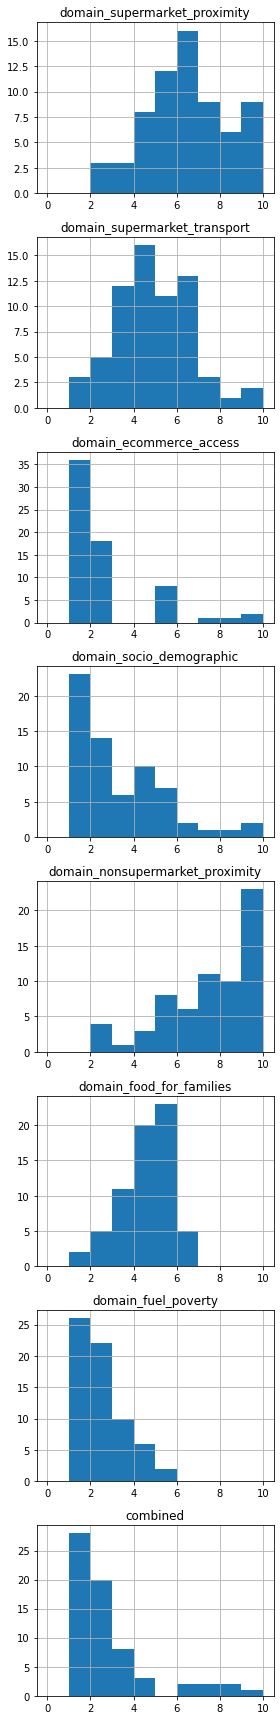

In [102]:
domains = ['domain_supermarket_proximity',
          'domain_supermarket_transport',
          'domain_ecommerce_access',
          'domain_socio_demographic',
          'domain_nonsupermarket_proximity',
          'domain_food_for_families',
          'domain_fuel_poverty', 
          'combined']

fig, axs = plt.subplots(8,1,figsize=(4,24))


c = 0
for d in domains:
    bw_pp[d].astype(int).hist(ax=axs[c], bins=[0,1,2,3,4,5,6,7,8,9,10])
    axs[c].set_title(d)
    c+=1
    plt.tight_layout()
    

In [103]:
bw_pp.combined.value_counts()

1     28
2     20
3      8
4      3
6      2
7      2
8      2
9      1
10     0
5      0
Name: combined, dtype: int64

In [104]:
bw_pp.shape

(66, 13)